In [271]:
import pandas as pd
import quandl, datetime
import math
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import pickle

In [228]:
quandl.ApiConfig.api_key = 'r7MKy3vK1Vwc_aq6ah3p'
originaldf = quandl.get('WIKI/GOOGL')

In [300]:
originaldf.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [301]:
df = originaldf

In [302]:
df.shape

(3424, 12)

In [303]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [304]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [305]:
df['HL_PCT']= (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close']* 100

C:\Users\17202\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [306]:
df['PCT_change'] = (df['Adj. Close']- df['Adj. Open'])/df['Adj. Open']* 100

C:\Users\17202\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [307]:
df = df[['Adj. Close','HL_PCT', 'PCT_change', 'Adj. Volume']] 

In [308]:
df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0
2004-08-26,54.122070,0.037068,2.820391,7094800.0
2004-08-27,53.239345,2.326896,-1.803885,6211700.0
2004-08-30,51.162935,3.411430,-3.106003,5196700.0
2004-08-31,51.343492,1.308977,0.048866,4917800.0


In [309]:
forecast_col = 'Adj. Close'

In [310]:
df.isnull().sum()

Adj. Close     0
HL_PCT         0
PCT_change     0
Adj. Volume    0
dtype: int64

In [311]:
df.fillna(-99999, inplace = True)

In [312]:
#using data that came past 10 days to predict today
#trying to predict out 10% of the df
forecast_out = int(math.ceil(0.01*len(df)))

In [313]:
#column gets shifted up, so that the label column of each row
#will be the adj close 10 days into the future
#positive is 10 days into the past
#negative is 10 days into the future for 0.1 math.ceil
df['label'] = df[forecast_col].shift(-forecast_out)

In [314]:
df.isnull().sum()

Adj. Close      0
HL_PCT          0
PCT_change      0
Adj. Volume     0
label          35
dtype: int64

In [315]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849


In [316]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:] #this is what we are predicting, need to find m&b, then we can get y
X = X[:-forecast_out:]

In [317]:
df.dropna(inplace = True)
y = np.array(df['label'])

In [318]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2)

In [287]:
clf = LinearRegression(n_jobs = -1)
#fit = train, score = test
clf.fit(X_train, y_train) #trains the classifier


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [319]:
# saving a classifier using pickling to avoid doing the training step
with open('linearregression.pickle', 'wb') as f:
    pickle.dump(clf, f)

pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

#when we want to read from pickle, we can comment creating the model and its instance, 
#until saving in the pickle

In [320]:
#tests the data
accuracy = clf.score(X_test, y_test)

In [321]:
print(accuracy)

0.9782611359848458


In [322]:
print(forecast_out)

35


In [323]:
forecast_set = clf.predict(X_lately)

In [324]:
print(forecast_set, accuracy, forecast_out)

[1101.37106801 1071.76137013 1018.47635456 1060.23238929 1072.37603371
 1072.61821908 1091.24959085 1110.53838982 1113.66492959 1121.67040321
 1130.88689446 1128.46304022 1147.98223424 1163.63045569 1135.15884301
 1121.399212   1087.09639351 1102.38107231 1113.35943472 1120.45065239
 1134.24483511 1148.9717096  1180.47962216 1184.90862762 1156.68376516
 1167.80167524 1169.62366605 1152.41628548 1117.80576972 1114.2481199
 1111.94092291 1069.14322694 1041.27654573 1072.27068035 1020.05983154] 0.9782611359848458 35


In [325]:
df['forecast'] = np.nan

In [326]:
last_date = df.iloc[-1].name
last_date

Timestamp('2018-02-05 00:00:00')

In [327]:
last_unix = last_date.timestamp()
last_unix

1517788800.0

In [328]:
oneday = 86400
next_unix = last_unix + oneday

In [329]:
last_unix

1517788800.0

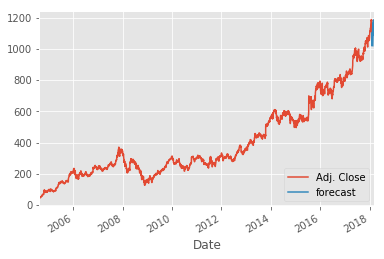

In [330]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += oneday
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['forecast'].plot()
plt.legend(loc=4)

# plt.savefig('foo.png')
plt.show()
    

In [121]:
# clf = svm.SVR(kernel = 'poly')
# #fit = train, score = test
# clf.fit(X_train, y_train) #trains the classifier
# accuracy = clf.score(X_test, y_test)#tests the data

C:\Users\17202\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [122]:
# print(accuracy)
# print(forecast_out)

0.6014086046355438
35


In [128]:
# d = [1,2,3,4,5]
# y = d[-2:]
# y

[4, 5]

In [221]:
# df.iloc[-47,:]

Adj. Close             NaN
HL_PCT                 NaN
PCT_change             NaN
Adj. Volume            NaN
label                  NaN
forecast       1165.220875
Name: 2018-02-28 17:00:00, dtype: float64

In [210]:
# df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,forecast
Date,,,,,,
2018-04-11 18:00:00,NaN,NaN,NaN,NaN,NaN,1198.778957
2018-04-12 18:00:00,NaN,NaN,NaN,NaN,NaN,1204.270888
2018-04-13 18:00:00,NaN,NaN,NaN,NaN,NaN,1202.781841
2018-04-14 18:00:00,NaN,NaN,NaN,NaN,NaN,1138.550103
2018-04-15 18:00:00,NaN,NaN,NaN,NaN,NaN,1086.497422
